In [1]:
import fastf1
from fastf1 import plotting
from fastf1 import utils
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib.collections import LineCollection
import datetime as dt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
# Enable the cache
fastf1.Cache.enable_cache('cache')

# Load the session data
session = fastf1.get_testing_session(2022, 2, 2)

# Collect all race laps
laps = session.load_laps(with_telemetry=True)

core           INFO 	Loading laps for Pre-Season Test - Practice 2 [v2.2.0-alpha0]
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for session_status_data
core        WARNING 	No lap data for driver 3
core        WARNING 	No lap data for driver 10
core        WARNING 	No lap data for driver 11
core        WARNING 	No lap data for driver 14
core        WARNING 	No lap data for driver 23
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	No cached data found for weather_data. Loading data...
api            INFO 	Fetching weather data...
core        WARNING 	Failed to load weather data!
core           INFO 	Loaded data for 20 drivers: ['55', '5', '

In [3]:
# Get laps of the drivers
driver1 = 'RUS'
laps_1 = laps.pick_driver(driver1)
laps_1.telemetry.head()

,Date,SessionTime,DriverAhead,DistanceToDriverAhead,Time,RPM,Speed,nGear,Throttle,Brake,DRS,Source,Distance,RelativeDistance,Status,X,Y,Z
2,2022-03-11 07:02:39.981,0 days 00:14:34.212000,,1925.357778,0 days 00:00:00,4070,34,0,0,0,8,interpolation,-0.219973,-6.136259e-07,OnTrack,-70,4890,0
3,2022-03-11 07:02:40.026,0 days 00:14:34.257000,,1925.357778,0 days 00:00:00.045000,4100,34,0,0,0,8,car,0.195833,5.462883e-07,OnTrack,-70,4895,0
4,2022-03-11 07:02:40.182,0 days 00:14:34.413000,,1925.357778,0 days 00:00:00.201000,4059,33,0,0,50,8,pos,1.610623,4.492924e-06,OnTrack,-70,4909,0
5,2022-03-11 07:02:40.266,0 days 00:14:34.497000,1,1925.357778,0 days 00:00:00.285000,4018,32,0,0,100,8,car,2.329167,6.497344e-06,OnTrack,-69,4916,0
6,2022-03-11 07:02:40.402,0 days 00:14:34.633000,1,1930.624444,0 days 00:00:00.421000,4033,30,0,0,100,8,pos,3.403056,9.493020e-06,OnTrack,-69,4927,0


slope: [[7.81]]
coefficient of determination: 0.94


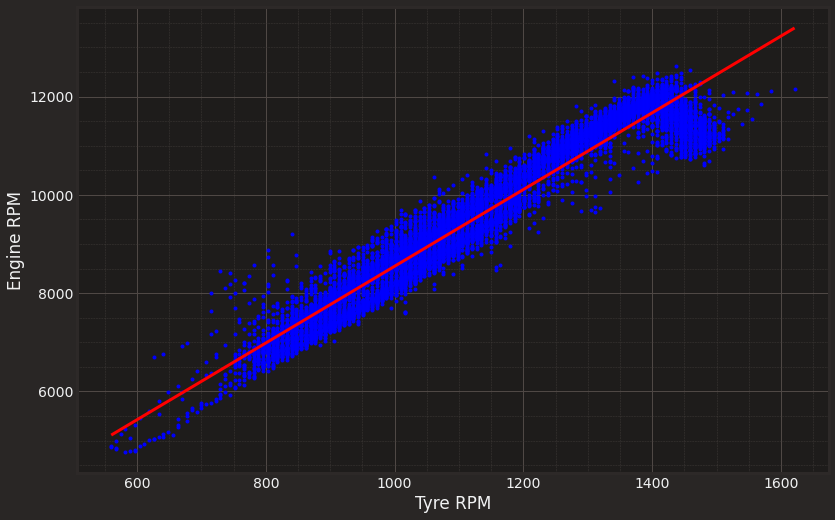

In [22]:
#estimating gear relationship
#diameter of a tyre = .72m
tyre_rpm = laps_1.telemetry.loc[(laps_1.telemetry.nGear==4) & (laps_1.telemetry.Speed>30)].Speed*(1000/60)/(2*3.141592653589793*(0.72/2))
eng_rpm = laps_1.telemetry.loc[(laps_1.telemetry.nGear==4) & (laps_1.telemetry.Speed>30)].RPM

plotting.setup_mpl()
#plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(tyre_rpm, eng_rpm, 'bo', markersize=3)

#linear regression model
model = LinearRegression()
x = np.array([tyre_rpm]).reshape(-1, 1)
y = np.array([eng_rpm]).reshape(-1, 1)
model.fit(x, y)
model = LinearRegression().fit(x, y)
x_new = np.linspace(min(x), max(x), 100)
y_new = model.predict(x_new[:])
ax.plot(x_new, y_new, color="red", linewidth=3)
ax.set_xlabel('Tyre RPM')
ax.set_ylabel('Engine RPM')
print('slope:', np.round(model.coef_, 2))
print('coefficient of determination:', np.round(model.score(x, y), 2))